In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans


In [2]:
image_path = '../output_videos/player_cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


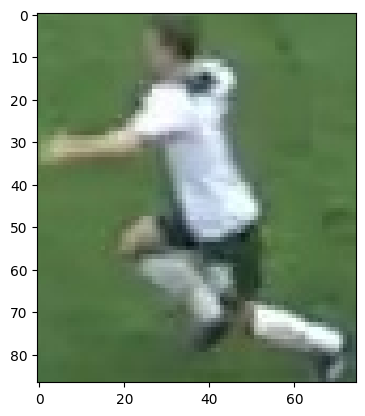

In [3]:
plt.imshow(image)
plt.show()

## Take the top half of the image


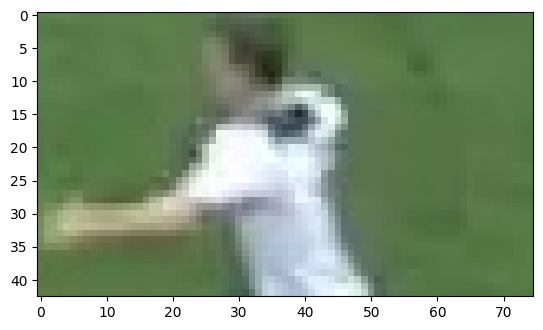

In [4]:
top_half_image = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

## Cluster image into tow clusters 

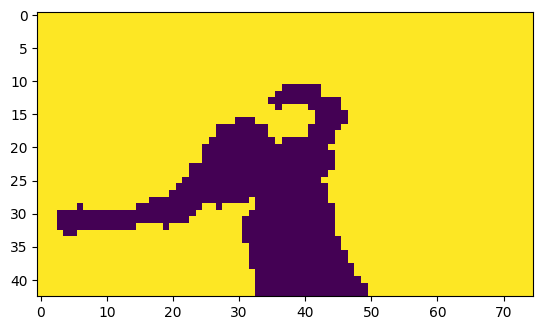

In [5]:
#reshape the image into 2D array
image_2d = top_half_image.reshape(-1, 3) 
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans = kmeans.fit(image_2d)
labels = kmeans.labels_ 

# reshape the label into the original image shape 
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1]) 

#Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [6]:
corner_clusters = [clustered_image[0,0],clustered_image[-1,0],clustered_image[0,-1],clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key = corner_clusters.count)
print(non_player_cluster)

1


In [7]:
player_cluster = 1-non_player_cluster
player_cluster

0

In [8]:
kmeans.cluster_centers_[player_cluster]

array([198.69479354, 209.005386  , 211.68222621])